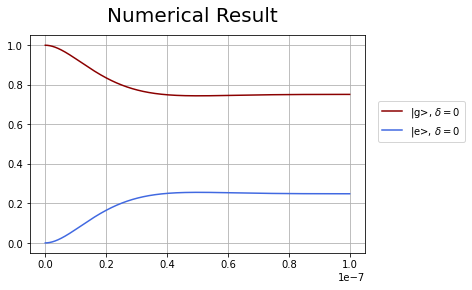

first time 0.002020120620727539
calc time 0.4851369857788086
0.28187990188598633
steps 1.0E+04
(0.24867066626164325-1.5641057443704375e-26j)
0.09927513254475653


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline

##493 two level simulation at  saturatoin

def Euler(rho,L,Ld,t,rho_2):
    temp = np.cos(wl*t)
    for i in range(1,len(t)):
        H=Ham(t[i-1],temp[i-1])
        H = np.matmul(np.matmul(Uni(t[i-1]),H), Unic(t[i-1]))
        rho[i] = rho[i-1]+del_t*(-1j*(np.matmul(H,rho[i-1])-np.matmul(rho[i-1],H)) \
                       -.5*(np.matmul(Ld,np.matmul(L,rho[i-1])) + np.matmul(rho[i-1], np.matmul(Ld,L))) + np.matmul(L,np.matmul(rho[i-1], Ld)))
        rho_2[i] = np.matmul(np.matmul(Unic(t[i-1]),rho[i]),Uni(t[i-1]))
    return(rho,rho_2)

### Two Level Atom ###                                
t0=time.time()                        
#create a list of times to simulate                                
del_t =1e-11
t = np.arange(0,1e-7,del_t)           

#create empty density matrix list and initial state
n=2 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0] = [[1,0],[0,0]] # initial conditions
rho_2 = np.zeros((len(t),n,n),dtype=complex)
rho_2[0] = [[1,0],[0,0]] # initial conditions

##create Hamiltonian, in this example we have 2 level system with coupling electric field

w0 = 2*np.pi*607e12  



gam=2*np.pi*15.1e6

## given beam parameters get a rabi freq W
I = 2*2.55e-6/(np.pi*(100e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam*3*sc.c**2/(4*a*w0**3))
W= E/sc.hbar*mu/2 ##Rabi Frequency

d=0 ##detuning
wl = w0-d

H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)
L[0,1] = np.sqrt(gam)
Ld[1,0] = np.sqrt(gam)

H_0[1,1] =  w0

def Ham(t,c):
    H_1[1,0] = H_1[0,1] = W*c
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result, res2 = Euler(rho,L,Ld,t,rho_2)
t2=time.time()

##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()

d2=0
Wp2= math.sqrt(W**2+d2**2)
plt.plot(t,result[:,0,0].real, color = 'darkred',label="|g>, $\delta = 0$ ")#
plt.plot(t,result[:,1,1].real, color = 'royalblue',label="|e>, $\delta = 0$ ")


# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()
t3=time.time()
print('first time', t1-t0)
print('calc time', t2-t1)
print(t3-t2)
print('steps', format(len(t),'.1E'))
plt.show()

print(result[-1,1,1])
print(W**2/(gam**2+2*W**2))